In [148]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error

In [185]:
train = pd.read_csv('Data for Cleaning & Modeling.csv')

C:\Users\Aakash Pahuja\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
test = pd.read_csv('Holdout for Testing.csv')

### Step 1: Preprocessing and Feature Mining

#### Drop X2, X3 as they are unique identifiers for each loan and borrower and not useful for our model

In [187]:
train.drop(['X2', 'X3'], axis=1, inplace=True)
test.drop(['X2', 'X3'], axis=1, inplace=True)

In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 30 columns):
X1     338990 non-null object
X4     399999 non-null object
X5     399999 non-null object
X6     399999 non-null object
X7     399999 non-null object
X8     338730 non-null object
X9     338730 non-null object
X10    376014 non-null object
X11    382462 non-null object
X12    338639 non-null object
X13    338972 non-null float64
X14    399999 non-null object
X15    399999 non-null object
X16    123560 non-null object
X17    399999 non-null object
X18    399981 non-null object
X19    399999 non-null object
X20    399999 non-null object
X21    399999 non-null float64
X22    399999 non-null float64
X23    399999 non-null object
X24    399999 non-null float64
X25    181198 non-null float64
X26    51155 non-null float64
X27    399999 non-null float64
X28    399999 non-null float64
X29    399999 non-null float64
X30    399733 non-null object
X31    399999 non-null float64
X32    399

#### Our dependent variable 'X1'  is missing values, we will replace them by using the mean of the whole column. We also need to change the type of the column from object to a float (by removing the '%' sign) for our model to interpret.

In [189]:
train['X1'] = pd.to_numeric(train['X1'].str.replace('%', ''))/100
train = train.dropna(subset=['X1'])

There are missing values for the X8 and X9 columns, which correspond to loan grades and loan subgrades. We will drop those rows from the data frame.

In [190]:
train.dropna(subset=['X8', 'X9'], inplace=True)

#### Remove column X16: Reason for applying for loan

As more than 50% of its values are missing and it is the borrower's reason for applying for the loan; this is another relatively unique text data type that will most likely not be useful for our model.

In [191]:
train.drop(['X16'], axis=1, inplace=True)


test.drop(['X16'], axis=1, inplace=True)

#### Remove column X10: Borrower-provided job title

Column X10, which corresponds to borrower-entered employer or job title, is missing almost 20000 values. This is also another unique character data type that won't be as useful to our model, so we will remove the variable altogether from both the test and training data set.

In [192]:
train.drop(['X10'], axis=1, inplace=True)

test.drop(['X10'], axis=1, inplace=True)

#### Remove rows where X13 column has missing values: Annual Income
We will not impute these missing values since it would create false information in a feature.

In [193]:
train.dropna(subset=['X13'], inplace=True)

#### Remove X18 column: Loan Title

This column is not useful for our predictive model as it is the loan title, provided by the borrower; it's another text data type unique to each observation with seemingly no impact on our target variable (interest rate). Secondly, most of the rows have meaningless text

In [194]:
train.drop(['X18'], axis=1, inplace=True)
test.drop(['X18'], axis=1, inplace=True)

#### Remove X25 and X26 from data sets: # of months since last delinquency and public record
I will delete these variables with reluctance. Both of these variables would seem to be good predictors for the interest rate assigned to a loan, but they both have more than 50% of their values missing in both the training and test data, we will remove the columns altogether.

In [195]:
train.drop(['X25', 'X26'], axis=1, inplace=True)
test.drop(['X25', 'X26'], axis=1, inplace=True)

#### Remove rows with missing values in X30 column: credit utilization percentage...
since there are only about some missing values in this column, we will delete these rows from both the training and the test sets. We will replace the missing values with the median value of the whole column.

In [196]:
train.dropna(subset=['X30'], inplace=True)
test['X30'] = pd.to_numeric(test['X30'].str.replace('%', ''))

test['X30'] = test['X30'].fillna(test.X30.median(axis=0))

#### Remove X1 (interest rate) variable from test set
This is the target variable that we are predicting for our test set, so we remove this empty column (and will replace it with our predictions later).

In [197]:
test.drop(['X1'], axis=1, inplace=True)

#### Remove X11 (Years of Employment) column from training and test sets...
In order to turn our column into float we need to remove symbols like '+, <', which would take out the meaning of most rows. Due to the high complexity of that column we will remove the column instead rather than fixing most rows.

In [198]:
test.drop(['X11'], axis=1, inplace=True)
train.drop(['X11'], axis=1, inplace=True)

#### Remove X15 (Date Loan was Issued)
Even though I think base interest rates may oscillate during certains months of any year, like seasons, this feature doesn't seem to be as strong as some of the other features, intuitively.

In [199]:
test.drop(['X15'], axis=1, inplace=True)
train.drop(['X15'], axis=1, inplace=True)

#### Remove X20 column (State)
Since we already have a more granular location feature being used for our model: first three of zip code. We do not the State column

In [200]:
test.drop(['X20'], axis=1, inplace=True)
train.drop(['X20'], axis=1, inplace=True)

#### Remove X23 column (Date of Earliest Line of Credit) from training and test set

In [201]:
test.drop(['X23'], axis=1, inplace=True)
train.drop(['X23'], axis=1, inplace=True)

#### Remove X32 column (Initial Listing Status of Loan) from training and test set¶
I do not think these initial listing status' would be available when predicting an interest rate for new customers.

In [202]:
test.drop(['X32'], axis=1, inplace=True)
train.drop(['X32'], axis=1, inplace=True)

#### Remove X12 Column (Home Ownership Status)
This feature does seem to correlate with loan interest rate, but the problem we have is that there are 61360 missing values. We do not want to combine or impute these values at the cost of creating incorrect signal for our model. 


In [203]:
test.drop(['X12'], axis=1, inplace=True)
train.drop(['X12'], axis=1, inplace=True)

#### Lets clean more of our columns with string data type in float data type in our training data (by removing the 'dollar', '%', signs and etc) for our model to interpret.

In [204]:
train['X4'] = train['X4'].str.replace('$', '')
train['X4'] = pd.to_numeric(train['X4'].str.replace(',', ''))
train['X5'] = train['X5'].str.replace('$', '')
train['X5'] = pd.to_numeric(train['X5'].str.replace(',', ''))
train['X6'] = train['X6'].str.replace('$', '')
train['X6'] = pd.to_numeric(train['X6'].str.replace(',', ''))
train['X7'] = pd.to_numeric(train['X7'].str.replace(' months', ''))
train['X19'] = pd.to_numeric(train['X19'].str.replace('x', ''))
train['X21'] = train['X21']/100 # convert dti percentage to ratio
train['X13'] = train['X13'].astype(int) # convert to interger type
train['X22'] = train['X22'].astype(int) # convert to interger type
train['X24'] = train['X24'].astype(int) # convert to interger type
train['X27'] = train['X27'].astype(int) # convert to interger type
train['X28'] = train['X28'].astype(int) # convert to interger type
train['X29'] = train['X29'].astype(int) # convert to interger type
train['X30'] = train['X30'].str.replace('%', '')
train['X30'] = pd.to_numeric(train['X30'].str.replace(',', ''))/100
train['X31'] = train['X31'].astype(int) # convert to interger type

## Categorical Features

Notice that the **X8, X9, X14 and X17** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

### To be noted
I initially was using pd.get_dummies to create dummy variables. But later when I was trying to predict the interest rates on my ***Holdout for Testing data***, I was getting the following error:

ValueError: feature_names mismatch: ['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X13', 'X14', 'X19', 'X21', 'X22', 'X24', 'X27', 'X28', 'X29', 'X30', 'X31', 'X17_credit_card', 'X17_debt_consolidation', 'X17_educational', 'X17_home_improvement', 'X17_house', 'X17_major_purchase', 'X17_medical', 'X17_moving', 'X17_other', 'X17_renewable_energy', 'X17_small_business', 'X17_vacation', 'X17_wedding'] ['X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X13', 'X14', 'X19', 'X21', 'X22', 'X24', 'X27', 'X28', 'X29', 'X30', 'X31', 'X17_credit_card', 'X17_debt_consolidation', 'X17_home_improvement', 'X17_house', 'X17_major_purchase', 'X17_medical', 'X17_moving', 'X17_other', 'X17_renewable_energy', 'X17_small_business', 'X17_vacation', 'X17_wedding']
expected X17_educational in input data

***Hence, I sticked with LabelEncoder instead***

#### Fit label encorder and return encoded integer labels for categorical string features

In [205]:
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,0.1189,25000,25000,19080,36,B,B4,85000,VERIFIED - income,debt_consolidation,941,0.1948,0,0,10,0,28854,0.521,42
1,0.1071,7000,7000,673,36,B,B5,65000,not verified,credit_card,112,0.1429,0,0,7,0,33623,0.767,7
2,0.1699,25000,25000,24725,36,D,D3,70000,VERIFIED - income,debt_consolidation,100,0.1050,0,0,10,0,19878,0.663,17
3,0.1311,1200,1200,1200,36,C,C2,54000,not verified,debt_consolidation,777,0.0547,0,0,5,0,2584,0.404,31
4,0.1357,10800,10800,10692,36,C,C3,32000,not verified,debt_consolidation,67,0.1163,0,1,14,0,3511,0.256,40


In [206]:
le = preprocessing.LabelEncoder()

train['X8'] = le.fit_transform(train['X8'].values)
train['X9'] = le.fit_transform(train['X9'].values)
train['X14'] = le.fit_transform(train['X14'].values)
train['X17'] = le.fit_transform(train['X14'].values)


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242983 entries, 0 to 399999
Data columns (total 19 columns):
X1     242983 non-null float64
X4     242983 non-null int64
X5     242983 non-null int64
X6     242983 non-null int64
X7     242983 non-null int64
X8     242983 non-null int32
X9     242983 non-null int32
X13    242983 non-null int32
X14    242983 non-null int32
X17    242983 non-null int64
X19    242983 non-null int64
X21    242983 non-null float64
X22    242983 non-null int32
X24    242983 non-null int32
X27    242983 non-null int32
X28    242983 non-null int32
X29    242983 non-null int32
X30    242983 non-null float64
X31    242983 non-null int32
dtypes: float64(3), int32(10), int64(6)
memory usage: 27.8 MB


In [208]:
train.head()

,X1,X4,X5,X6,X7,X8,X9,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,0.1189,25000,25000,19080,36,1,8,85000,0,0,941,0.1948,0,0,10,0,28854,0.521,42
1,0.1071,7000,7000,673,36,1,9,65000,2,2,112,0.1429,0,0,7,0,33623,0.767,7
2,0.1699,25000,25000,24725,36,3,17,70000,0,0,100,0.1050,0,0,10,0,19878,0.663,17
3,0.1311,1200,1200,1200,36,2,11,54000,2,2,777,0.0547,0,0,5,0,2584,0.404,31
4,0.1357,10800,10800,10692,36,2,12,32000,2,2,67,0.1163,0,1,14,0,3511,0.256,40


#### Convert string columns values to appropriate numeric data types in test data

In [209]:
test.head()

,X4,X5,X6,X7,X8,X9,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,"$6,000","$6,000","$6,000",36 months,C,C5,68000.0,VERIFIED - income,debt_consolidation,430xx,28.31,0,1,18,0,19861,64.5,33
1,"$24,000","$24,000","$24,000",36 months,A,A1,110480.0,VERIFIED - income,debt_consolidation,945xx,16.03,0,1,12,0,17001,26.2,36
2,"$35,000","$35,000","$35,000",36 months,C,C2,86000.0,VERIFIED - income,debt_consolidation,195xx,32.49,0,0,16,0,25797,49.9,33
3,"$10,000","$10,000","$10,000",60 months,D,D1,30000.0,VERIFIED - income source,debt_consolidation,921xx,32.96,0,1,13,1,9586,43.8,21
4,"$24,000","$24,000","$24,000",60 months,B,B1,82500.0,VERIFIED - income,debt_consolidation,196xx,31.03,0,0,27,0,31842,41.3,43


In [210]:
test['X4'] = test['X4'].str.replace('$', '')
test['X4'] = pd.to_numeric(test['X4'].str.replace(',', ''))
test['X5'] = test['X5'].str.replace('$', '')
test['X5'] = pd.to_numeric(test['X5'].str.replace(',', ''))
test['X6'] = test['X6'].str.replace('$', '')
test['X6'] = pd.to_numeric(test['X6'].str.replace(',', ''))
test['X7'] = pd.to_numeric(test['X7'].str.replace(' months', ''))
test['X19'] = pd.to_numeric(test['X19'].str.replace('x', ''))
test['X21'] = test['X21']/100 # convert dti percentage to ratio
test['X13'] = test['X13'].astype(int) # convert to interger type
test['X30'] = test['X30']/100 # convert revolving utilization to ratio

In [211]:
test.iloc[0:6, 3:20]

,X7,X8,X9,X13,X14,X17,X19,X21,X22,X24,X27,X28,X29,X30,X31
0,36,C,C5,68000,VERIFIED - income,debt_consolidation,430,0.2831,0,1,18,0,19861,0.645,33
1,36,A,A1,110480,VERIFIED - income,debt_consolidation,945,0.1603,0,1,12,0,17001,0.262,36
2,36,C,C2,86000,VERIFIED - income,debt_consolidation,195,0.3249,0,0,16,0,25797,0.499,33
3,60,D,D1,30000,VERIFIED - income source,debt_consolidation,921,0.3296,0,1,13,1,9586,0.438,21
4,60,B,B1,82500,VERIFIED - income,debt_consolidation,196,0.3103,0,0,27,0,31842,0.413,43
5,60,B,B3,64709,VERIFIED - income source,car,762,0.3433,0,0,8,0,18652,0.648,21


#### Fit label encorder and return encoded integer labels for categorical string features for test data

In [212]:
test['X8'] = le.fit_transform(test['X8'].values)
test['X9'] = le.fit_transform(test['X9'].values)
test['X14'] = le.fit_transform(test['X14'].values)
test['X17'] = le.fit_transform(test['X17'].values)

#### Separate the training data predictors from the targets

In [213]:
target = train['X1']
predictors = train.drop(['X1'], axis=1)

#### Scaling our data

In [178]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# predictors = sc.fit_transform(predictors)
# test = sc.transform(test)

In [182]:
# predictors = pd.DataFrame(predictors)

In [215]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242983 entries, 0 to 399999
Data columns (total 18 columns):
X4     242983 non-null int64
X5     242983 non-null int64
X6     242983 non-null int64
X7     242983 non-null int64
X8     242983 non-null int32
X9     242983 non-null int32
X13    242983 non-null int32
X14    242983 non-null int32
X17    242983 non-null int64
X19    242983 non-null int64
X21    242983 non-null float64
X22    242983 non-null int32
X24    242983 non-null int32
X27    242983 non-null int32
X28    242983 non-null int32
X29    242983 non-null int32
X30    242983 non-null float64
X31    242983 non-null int32
dtypes: float64(2), int32(10), int64(6)
memory usage: 26.0 MB


In [216]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
X4     80000 non-null int64
X5     80000 non-null int64
X6     80000 non-null int64
X7     80000 non-null int64
X8     80000 non-null int32
X9     80000 non-null int32
X13    80000 non-null int32
X14    80000 non-null int32
X17    80000 non-null int32
X19    80000 non-null int64
X21    80000 non-null float64
X22    80000 non-null int64
X24    80000 non-null int64
X27    80000 non-null int64
X28    80000 non-null int64
X29    80000 non-null int64
X30    80000 non-null float64
X31    80000 non-null int64
dtypes: float64(2), int32(5), int64(11)
memory usage: 9.5 MB


### Step 2: Build Machine Learning model in Python to predict the interest rates assigned to loans

#### Train a DecisionTreeRegressor

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(predictors, target)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [220]:
from sklearn.metrics import mean_squared_error as MSE

# Predict interest rates for test data
y_pred = dt.predict(test)

# Predict interest rates of training data
train_pred = dt.predict(predictors)

# Compute mse_dt
mse_dt = MSE(target, train_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("RMSE on training data of dt is: {:.2f}".format(rmse_dt))

RMSE on training data of dt is: 0.01


In [227]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, predictors, target, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for dt is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for dt is: 0.01


#### Now we instantiate a DecisionTreeRegressor dt with different parameters (max_dept is decreased from 8 to 4, min_samples_leaf is doubled from 0.13 to 0.26)

In [228]:
SEED = 1

# Instantiate a DecisionTreeRegressor dt with different parameters
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)


# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, predictors, target, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for dt is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for dt is: 0.03


In [230]:
# Predict interest rates for test data
y_pred = dt.predict(test)

# Fit dt to the training set
dt.fit(predictors, target)

# Predict the labels of the training set
y_pred_train = dt.predict(predictors)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(target, y_pred_train))**(1/2)

# Print RMSE_train
print('RMSE on training data for dt is: {:.2f}'.format(RMSE_train))

RMSE on training data for dt is: 0.03


#### Train a RandomForestRegressor

In [231]:
from sklearn.ensemble import RandomForestRegressor
# Set seed for reproducibility
SEED = 1

In [234]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)

In [236]:
# Fit 'rf' to the training set
rf.fit(predictors, target)
# Predict the test set labels 'y_pred'
#y_pred = rf.predict(test)
y_pred_train = rf.predict(predictors)
# Evaluate the train set RMSE
rmse_train = MSE(target, y_pred_train)**(1/2)
# Print the train set RMSE
print('RMSE on training data of rf is: {:.2f}'.format(rmse_train))

RMSE on training data of rf is: 0.02


In [237]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(test)

In [250]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(rf, predictors, target, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for rf is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for rf is: 0.02


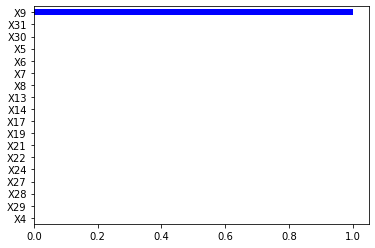

In [240]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = test.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

#### Train the Gradient Boost Reegressor model on the training data and predict on the test data to get the loan rates

In [252]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(predictors, target)

# Predict train set lables
y_train_pred = gb.predict(predictors)

# Predict test set labels
y_pred_Gboost = gb.predict(test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_train = MSE(target, y_train_pred)

# Compute RMSE
rmse_train = mse_train**(1/2)

# Print RMSE
print('RMSE of train set for gb: {:.3f}'.format(rmse_train))

RMSE of train set for gb: 0.007


In [253]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(gb, predictors, target, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE on training data for rf is: {:.2f}'.format(RMSE_CV))

CV RMSE on training data for rf is: 0.01


#### Train the RidgeCV regression model on the training data

In [137]:
ridge = RidgeCV(cv=10)
predictor = ridge.fit(predictors, target)
ridge.alpha_

10.0

#### Using trained RidgeCV regression model to predict interest rates of training and test data

In [139]:
train_pred = predictor.predict(predictors)

In [140]:
test['X30'].shape

(80000,)

In [141]:
ridge_test_pred = predictor.predict(test)

In [76]:
print('RMSE on training data: ', np.sqrt(mean_squared_error(target, train_pred)))

RMSE on training data:  0.009024720254823652


An RMSE of 0.009 doesn't seem to be bad, especially for a general linear regression model using that only uses ridge regression to account for potential multicollineararity between features.

#### Train the Extreme Gradient Booster (xgb) model on a train_test_split of the training data with a manually-tuned set of hyperparameters

We will split the training set into a training and validation set to make sure our model doesn't significantly overfit our training data and perform poorly on our test data.

In [242]:
import xgboost as xgb
from xgboost import plot_importance

In [243]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors,
    target,
    test_size=.2,
    random_state=42)

In [244]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [245]:
# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

In [246]:
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[21:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:0.32727
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:0.29457
[2]	Test-rmse:0.26515
[3]	Test-rmse:0.23867
[4]	Test-rmse:0.21483
[5]	Test-rmse:0.19339
[6]	Test-rmse:0.17409
[7]	Test-rmse:0.15673
[8]	Test-rmse:0.14110
[9]	Test-rmse:0.12704
[10]	Test-rmse:0.11440
[11]	Test-rmse:0.10302
[12]	Test-rmse:0.09279
[13]	Test-rmse:0.08359
[14]	Test-rmse:0.07532
[15]	Test-rmse:0.06788
[16]	Test-rmse:0.06119
[17]	Test-rmse:0.05519
[18]	Test-rmse:0.04979
[19]	Test-rmse:0.04495
[20]	Test-rmse:0.04060
[21]	Test-rmse:0.03671
[22]	Test-rmse:0.03322
[23]	Test-rmse:0.03010
[24]	Test-rmse:0.02731
[25]	Test-rmse:0.02482
[26]	Test-rmse:0.02260
[27]	Test-rmse:0.02062
[28]	Test-rmse:0.01887
[29]	Test-rmse:0.01732
[30]	Test-rmse:0.01595
[31]	Test-rmse:0.01475
[32]	Test-rmse:0.01370
[33]	Test-rmse:0.

[337]	Test-rmse:0.00702
[338]	Test-rmse:0.00702
[339]	Test-rmse:0.00702
[340]	Test-rmse:0.00702
[341]	Test-rmse:0.00702
[342]	Test-rmse:0.00702
[343]	Test-rmse:0.00702
[344]	Test-rmse:0.00702
[345]	Test-rmse:0.00702
[346]	Test-rmse:0.00702
[347]	Test-rmse:0.00702
[348]	Test-rmse:0.00702
[349]	Test-rmse:0.00702
[350]	Test-rmse:0.00702
[351]	Test-rmse:0.00702
[352]	Test-rmse:0.00702
[353]	Test-rmse:0.00702
[354]	Test-rmse:0.00702
[355]	Test-rmse:0.00702
[356]	Test-rmse:0.00702
[357]	Test-rmse:0.00702
[358]	Test-rmse:0.00702
[359]	Test-rmse:0.00702
[360]	Test-rmse:0.00702
[361]	Test-rmse:0.00702
[362]	Test-rmse:0.00702
[363]	Test-rmse:0.00702
[364]	Test-rmse:0.00702
[365]	Test-rmse:0.00701
[366]	Test-rmse:0.00701
[367]	Test-rmse:0.00701
[368]	Test-rmse:0.00701
[369]	Test-rmse:0.00701
[370]	Test-rmse:0.00701
[371]	Test-rmse:0.00701
[372]	Test-rmse:0.00701
[373]	Test-rmse:0.00701
[374]	Test-rmse:0.00701
[375]	Test-rmse:0.00701
[376]	Test-rmse:0.00701
[377]	Test-rmse:0.00701
[378]	Test-rmse:

In [247]:
# convert training data to DMatrix object
dpred=xgb.DMatrix(predictors)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), target)))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(test))

RMSE of XGB model on training data:  0.006679262830529538


Plot F-score of each feature using xgboost's .plot_importance() method

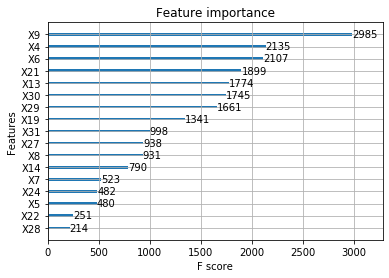

In [248]:
plt.show(plot_importance(model))

Lets look futher into the relationship between loan subgrades and interest rate by generating a scatter plot of the two variables to discern if there is a specific relationship between the two

Text(0, 0.5, 'Loan subgrade for test data')

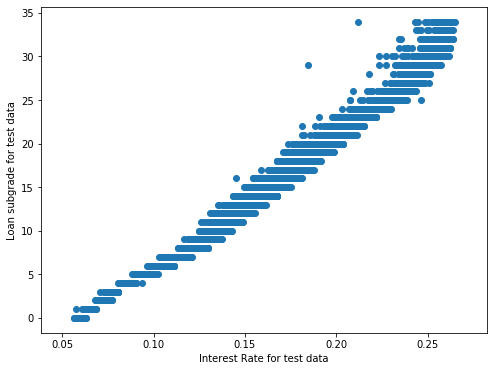

In [260]:
plt.figure(figsize=(8,6))
plt.scatter(GBDT_test_pred, test['X9'],cmap='plasma')
plt.xlabel('Interest Rate for test data')
plt.ylabel('Loan subgrade for test data')

Interestingly, it looks like the loan subgrade is the most important feature in predicting interest loan rates (this can be further explained by the scatter plot plotted above, which shows that both the variables are highly and postively correlated) followed by loan amount requested and invester funded portion of the loan. The number of 30 day+ past-due incidences of delinquencies in the borrow's credit file for the past 2 years and the number of derogatory public records were the least important features.

In [267]:
type(XGB_test_pred)

pandas.core.frame.DataFrame

In [268]:
df = XGB_test_pred.XGBPredictions * 100

In [274]:
df = df.round(2)
df.head()

0    16.50
1     6.05
2    14.28
3    16.23
4     9.79
Name: XGBPredictions, dtype: float32

In [275]:
fina_df = df.astype(str) + '%'

In [278]:
fina_df

0         16.5%
1         6.05%
2        14.28%
3        16.23%
4         9.79%
          ...  
79995     6.58%
79996    20.37%
79997    18.38%
79998     14.3%
79999    13.28%
Name: XGBPredictions, Length: 80000, dtype: object

In [277]:
# write out csv for our final model's test predictions
fina_df.to_csv("Aakash_Pahuja_Results_from_ExtremeGradientBoosted.csv")

C:\Users\Aakash Pahuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


### Discussion of Model Selection and Results:

For ensemble methods, we did not have to standardize or normalize our data.

***DecisionTreeRegressor:***
The first model I selected to predict interest rates was using a Decision Tree Regressor model. The Decision Tree Regressor model with max_depth as 8, min_samples_leaf as 0.13 and random_state as 3 produced an RMSE of 0.01 when predicting on the training data and also while computing the 10-folds CV RMSE on the same parameters.(An equal RMSE for both the training data and after applying cross-validation on the training data means that there wasn't any overfitting or underfitting).

We also instantiated a DecisionTreeRegressor dt with different parameters (max_dept was decreased from 8 to 4 to account for overfitting, min_samples_leaf is doubled from 0.13 to 0.26) which produced a RMSE of 0.03 when predicting on the training data and also while computing the 10-folds CV RMSE on the same parameters.

***RandomForestTreeRegressor:*** 
The second model I selected to predict interest rates was using a Random Forest Regressor model. The Random Forest Regressor model with n_estimators as 400, min_samples_leaf as 0.12 and random_state as 1 produced an RMSE of 0.02 when predicting on the training data and also while computing the 10-folds CV RMSE on the same parameters. (Over here we got an equal RMSE for both the training data and after applying cross-validation on the training data, which means that there wasn't any overfitting or underfitting).

***Gradient Boost Regressor:*** 
The Gradient Boost Regressorr model with n_estimators as 4, n_estimators as 200 and random_state as 2 produced an RMSE of 0.007 when predicting on the training data and a RMSE of 0.01 while computing the 10-folds CV RMSE on the same parameters. (Over here the training RMSE is less than the CV RMSE, which means that there is underfitting in our data, in that case we have to reduce the bias in our data, (hence, we did not go with this model as our optimal model. We showed that in another model, a much better version of Gradient Boost Regressor is the Extreme Gradient Boosted Decision Tree Model). 

***RidgeCV()***
The model I selected to predict interest rates was a ridge regression model using scikitlearn's RidgeCV() esitmator. Ridge regression is a multiple linear regression model,
The RidgeCV regression model (with 10-fold cv technique used to optimize alpha parameter) produced an RMSE of 0.0090 when predicting on the training data. Which means the RMSE in prediction is roughly the equivalent of plus or minus 0.90 of the the true value of the interest rate

***Extremem Gradient Boosted Decision Tree Model:*** (remove the extra details)
I used XGBoost's python module xgboost as it provides relatively high customization options for hyperparameters and relatively fast processing with its built-in parellel processing when building decision trees. I manually tuned some parameters via trial-and-error efforts, which were
- max_depth: the max_depth of each decision tree built. This is used to control over-fitting of the training data as higher depths will fit to more noise in the training data. Final value used: 6
- min_child_weight: this is the sum of the weights defined for each child of each learner. This is used to also control overfitting of training data. Final value used: 1.
- eta: this is essentially the learning rate of the model or the alpha value when gradient descent occurs. Final values used: 0.1
- subsample: Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Final value: 1
- colsample_bytree: similar to subsample except it is the fraction of columns to be randomly sampled for each tree. Final value: 1
- num_boosting_rounds: Final value: 441
- early_stopping_rounds: If the testing scores don't improve after 10 consecutive iterations, the model will stop and take the best score. Final value: 10

It should be noted that I trained the XGB model on only 90% of the training data as the other 10% was randomly sampled from the training data and allocated as test data to optimize the general fit of the model during training. This helps ensure that overfitting doesn't occur on the training data.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
The RMSE of the XGB model on the training data was roughly 0.0066. Which was the lowest compared to the other four models we used to predict the interest rate on the train data.

Although all models were regularized and optimized to prevent overfitting and underfitting as much as possible, I would expect the RMSE values on the test set predictions from all models to be slightly higher than their respective training set RMSE's as the models are naturally going to predict better on the data that they were trained on. Furthermore, I believe my preprocessing techniques were limited to my inuitive (and learned) understanding of features that may influence interest rates of loans. I removed quite a few columns from the data that may have been useful indicators.